# U1B model: running againt fot $\theta_W^p=0$

The idea is to run againt the good DM points

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator
import neutrino_analytic_v2
import NEUTRINO2018

In [6]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

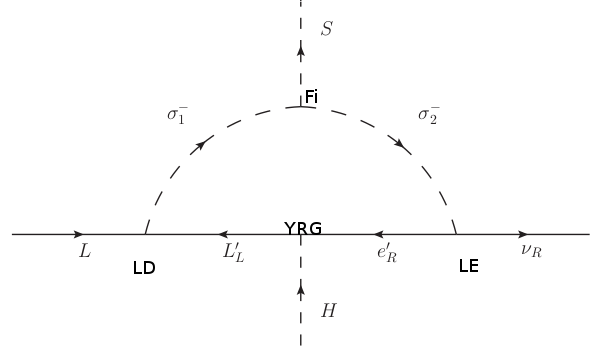

In [3]:
from IPython.display import Image
Image("zee-couplings.png")

In [5]:
#Read old file
xd = pd.read_csv('general-scan-TWp30.csv')
del xd['Unnamed: 0']

In [7]:
xd.shape

(349622, 105)

## Dark matter $\Omega h^2$

In [8]:
#Experimental values for DM:Planck results 2018
e = 10
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.108 0.12 0.132


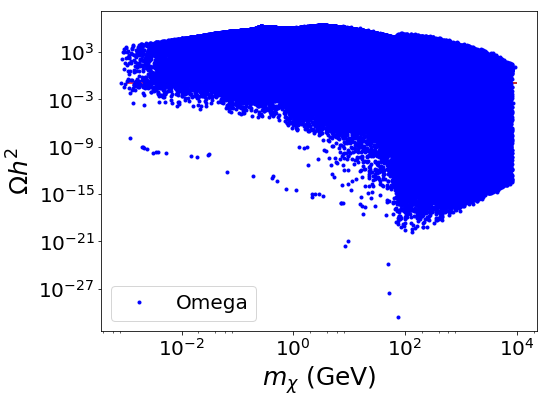

In [10]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi,xd.Omega,'b.')

plt.hlines(Omega_max,1e-2,1e4, 'c',label=r'')
plt.hlines(Omega_min,1e-2,1e4, 'c',label=r'')

plt.xlabel(r'$m_{\chi}$ (GeV)',size=25)
plt.ylabel(r'$\Omega h^2$',size=25)
plt.legend()

plt.hlines(Omega,1e-3,1e4, 'r',label=r'$\Omega h^2=$0.12')
#plt.ylim(Omega_min,Omega_max)

plt.tight_layout()

In [24]:
yd = xd[np.logical_and(xd.Omega >= Omega_min, xd.Omega <= Omega_max)]

In [25]:
print(xd.shape, yd.shape)

(349622, 105) (2244, 105)


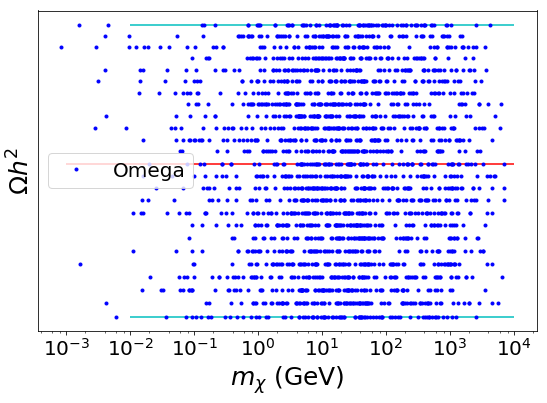

In [26]:
plt.figure(figsize=(8,6))

plt.loglog(yd.mchi,yd.Omega,'b.')

plt.hlines(Omega_max,1e-2,1e4, 'c',label=r'')
plt.hlines(Omega_min,1e-2,1e4, 'c',label=r'')

plt.xlabel(r'$m_{\chi}$ (GeV)',size=25)
plt.ylabel(r'$\Omega h^2$',size=25)
plt.legend()

plt.hlines(Omega,1e-3,1e4, 'r',label=r'$\Omega h^2=$0.12')

plt.tight_layout()

In [16]:
yd[:2]

,Lambda2,Lambda3,Lambda4,Lambda5,muj,YA1,YA2,YB1,YB2,YC1,...,S,U,meg,g2mu,Omega,SIP,SDP,SIN,SDN,sv
71,-0.216982,0.063291,-0.006037,-0.220137,3.344876e+07,0.925076,0.025879,0.010332,0.000350,0.037889,...,-0.140036,0.048754,1.644199e-20,2.215739e-14,0.108,8.283000e-07,4.768000e-58,8.289000e-07,3.900000e-58,1.530000e-26
75,-0.106215,0.008585,-0.006572,-0.000921,4.752859e+08,0.000662,0.000497,0.011971,0.000715,0.121618,...,-0.028287,0.219218,2.232722e-11,-1.715948e-12,0.120,7.330000e-05,4.393000e-01,3.195000e-03,3.359000e-01,2.860000e-26


In [27]:
yd = yd.reset_index()
del[yd['index']]

In [28]:
yd[:2]

,Lambda2,Lambda3,Lambda4,Lambda5,muj,YA1,YA2,YB1,YB2,YC1,...,S,U,meg,g2mu,Omega,SIP,SDP,SIN,SDN,sv
0,-0.216982,0.063291,-0.006037,-0.220137,3.344876e+07,0.925076,0.025879,0.010332,0.000350,0.037889,...,-0.140036,0.048754,1.644199e-20,2.215739e-14,0.108,8.283000e-07,4.768000e-58,8.289000e-07,3.900000e-58,1.530000e-26
1,-0.106215,0.008585,-0.006572,-0.000921,4.752859e+08,0.000662,0.000497,0.011971,0.000715,0.121618,...,-0.028287,0.219218,2.232722e-11,-1.715948e-12,0.120,7.330000e-05,4.393000e-01,3.195000e-03,3.359000e-01,2.860000e-26


In [29]:
yd['Lambda2'][1]

-0.10621539775732459

In [36]:
for i in range(0,2):
    kk = yd.g1p[i]
    print(kk)

0.106055722082
2.35203713483e-06


In [59]:
yd.shape

(2244, 105)

In [69]:
# Tiempo inicial
t1=time.time() 

x=[]

Num = 2

for i in range(0,Num):
    
    #opend the dictionary   
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()
    
    Lambda2= yd.Lambda2[i]
    Lambda3= yd.Lambda3[i]
    Lambda4= yd.Lambda4[i]
    Lambda5= yd.Lambda5[i]
    muj= yd.muj[i]   
    YA1= yd.YA1[i]
    YA2= yd.YA2[i]
    YB1 = yd.YB1[i]
    YB2= yd.YB2[i] 
    YC1= yd.YC1[i]
    YC2= yd.YC2[i]    
    YRG= yd.YRG[i]
    YRH= yd.YRH[i]
    vx = yd.vx[i]
    g1p= yd.g1p[i]

    Fi11= yd.Fi11[i]
    Fi12= yd.Fi12[i]
    Fi21= yd.Fi21[i]
    Fi22= yd.Fi22[i]

    Fj11= yd.Fj11[i]
    Fj12= yd.Fj12[i]
    Fj21= yd.Fj21[i]
    Fj22= yd.Fj22[i]

    L611= yd.L611[i]
    L612= yd.L612[i]
    L621= yd.L621[i]
    L622= yd.L622[i]

    L711= yd.L711[i]
    L712= yd.L712[i]
    L721= yd.L721[i]
    L722= yd.L722[i]
    
    M111= yd.M111[i]
    M112= yd.M112[i]
    M121= yd.M121[i]
    M122= yd.M122[i]

    M211= yd.M211[i]
    M212= yd.M212[i]
    M221= yd.M221[i]
    M222= yd.M222[i]

    hd11= yd.hd11[i]
    hd12= yd.hd12[i]
    hd13= yd.hd13[i]
    hd21= yd.hd21[i]
    hd22= yd.hd22[i]
    hd23= yd.hd23[i]

    he12= yd.he12[i]
    he13= yd.he13[i]
    he22= yd.he22[i]
    he23= yd.he23[i]
    L1= yd.L1[i]
    L2= yd.L2[i]
    mv1= yd.mv1[i]
    mv2= yd.mv2[i]
    mv3= yd.mv3[i]

    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%Lambda2
    xdict.blocks['MINPAR'].entries[3]='%.6E    # Lambda3INPUT'%Lambda3
    xdict.blocks['MINPAR'].entries[4]='%.6E    # Lambda4INPUT'%Lambda4
    xdict.blocks['MINPAR'].entries[5]='%.6E    # Lambda5INPUT'%Lambda5
    xdict.blocks['MINPAR'].entries[6]='%.6E    # mujINPUT'%muj   
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[8]='%.6E    # YA2INPUT'%YA2
    xdict.blocks['MINPAR'].entries[9]='%.6E    # YB1INPUT'%YB1
    xdict.blocks['MINPAR'].entries[10]='%.6E    # YB2INPUT'%YB2 
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[12]='%.6E    # YC2INPUT'%YC2    
    xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
    xdict.blocks['MINPAR'].entries[14]='%.6E    # YRHINPUT'%YRH
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx
    xdict.blocks['MINPAR'].entries[16]='%.6E    # g1pINPUT'%g1p

    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
    xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
    xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
    xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22
    
    xdict.blocks['FJIN'].entries[1,1]='%.6E    # Fj(1,1)'%Fj11
    xdict.blocks['FJIN'].entries[1,2]='%.6E    # Fj(1,2)'%Fj12
    xdict.blocks['FJIN'].entries[2,1]='%.6E    # Fj(2,1)'%Fj21
    xdict.blocks['FJIN'].entries[2,2]='%.6E    # Fj(2,2)'%Fj22
    
    xdict.blocks['L6IN'].entries[1,1]='%.6E    # lam6(1,1)'%L611
    xdict.blocks['L6IN'].entries[1,2]='%.6E    # lam6(1,2)'%L612
    xdict.blocks['L6IN'].entries[2,1]='%.6E    # lam6(2,1)'%L621
    xdict.blocks['L6IN'].entries[2,2]='%.6E    # lam6(2,2)'%L622
    
    xdict.blocks['L7IN'].entries[1,1]='%.6E    # lam7(1,1)'%L711
    xdict.blocks['L7IN'].entries[1,2]='%.6E    # lam7(1,2)'%L712
    xdict.blocks['L7IN'].entries[2,1]='%.6E    # lam7(2,1)'%L721
    xdict.blocks['L7IN'].entries[2,2]='%.6E    # lam7(2,2)'%L722
    
    xdict.blocks['M1IN'].entries[1,1]='%.6E    # m1(1,1)'%M111
    xdict.blocks['M1IN'].entries[1,2]='%.6E    # m1(1,2)'%M112
    xdict.blocks['M1IN'].entries[2,1]='%.6E    # m1(2,1)'%M121
    xdict.blocks['M1IN'].entries[2,2]='%.6E    # m1(2,2)'%M122
    
    xdict.blocks['M2IN'].entries[1,1]='%.6E    # m2(1,1)'%M211
    xdict.blocks['M2IN'].entries[1,2]='%.6E    # m2(1,2)'%M212
    xdict.blocks['M2IN'].entries[2,1]='%.6E    # m2(2,1)'%M221
    xdict.blocks['M2IN'].entries[2,2]='%.6E    # m2(2,2)'%M222

    xdict.blocks['LDIN'].entries[1,1]='%.6E    # LD(1,1)'%hd11
    xdict.blocks['LDIN'].entries[1,2]='%.6E    # LD(1,2)'%hd12
    xdict.blocks['LDIN'].entries[1,3]='%.6E    # LD(1,3)'%hd13
    xdict.blocks['LDIN'].entries[2,1]='%.6E    # LD(2,1)'%hd21
    xdict.blocks['LDIN'].entries[2,2]='%.6E    # LD(2,2)'%hd22
    xdict.blocks['LDIN'].entries[2,3]='%.6E    # LD(2,3)'%hd23

    xdict.blocks['LEIN'].entries[1,1]='%.6E    # LE(1,1)'%he12
    xdict.blocks['LEIN'].entries[1,2]='%.6E    # LE(1,2)'%he13
    xdict.blocks['LEIN'].entries[2,1]='%.6E    # LE(2,1)'%he22
    xdict.blocks['LEIN'].entries[2,2]='%.6E    # LE(2,2)'%he23

    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 
    
    #run SPheno againt
    if (5.*g1p*vx) > 91.1887:
        spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
        so = subprocess.getoutput('cat SPheno.spc.U1B')
    
    else:
        spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1Blight LesHouches.in.U1B_low')   
        
        subprocess.getoutput('cp SPheno.spc.U1Blight SPheno.spc.U1B')
        
        so = subprocess.getoutput('cat SPheno.spc.U1Blight')

    #take spheno output
    ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
    ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
    ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
    ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

    ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
    ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
    ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
    ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

    ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
    ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
    ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
    ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

    ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
    ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
    ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
    ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])
    
    mh1 = eval(so.split('#   PDG code')[1].split()[3])
    mh2 = eval(so.split('#   PDG code')[1].split()[7])
    mH2 = eval(so.split('Block MASS')[1].split()[17])
    mH3 = eval(so.split('Block MASS')[1].split()[21])
    mH4 = eval(so.split('Block MASS')[1].split()[25])
    mH5 = eval(so.split('Block MASS')[1].split()[29])
    mss = eval(so.split('Block MASS')[1].split()[33]) 
    MZ = eval(so.split('Block MASS')[1].split()[37])
    MZp = eval(so.split('# VWm')[1].split()[1])
    mnu1 = np.abs(eval(so.split('# Fe_3')[1].split()[1]))
    mnu2 = np.abs(eval(so.split('# Fe_3')[1].split()[5]))
    mnu3 = np.abs(eval(so.split('# Fe_3')[1].split()[13]))
        
    if mh1 == 1.0: #bad higgs mass
        continue
    
    mchi = eval(so.split('# Fv_5')[1].split()[1])
    mFv = eval(so.split('# Fv_5')[1].split()[5])
    meD1=eval(so.split('# Fvv')[1].split()[1])
    meD2=eval(so.split('# Fvv')[1].split()[5])

    VL11=eval(so.split('Block UELDMIX')[1].split()[6])
    VL12=eval(so.split('Block UELDMIX')[1].split()[11])
    VL21=eval(so.split('Block UELDMIX')[1].split()[16])
    VL22=eval(so.split('Block UELDMIX')[1].split()[21])

    UL11=eval(so.split('Block UERDMIX')[1].split()[6])
    UL12=eval(so.split('Block UERDMIX')[1].split()[11])
    UL21=eval(so.split('Block UERDMIX')[1].split()[16])
    UL22=eval(so.split('Block UERDMIX')[1].split()[21])
    
    T = eval(so.split('Block SPhenoLowEnergy')[1].split()[5])
    S = eval(so.split('Block SPhenoLowEnergy')[1].split()[11])
    U = eval(so.split('Block SPhenoLowEnergy')[1].split()[17])
    meg = eval(so.split('Block FlavorKitLFV # lepton')[1].split()[4])
    g2mu = eval(so.split('Block SPhenoLowEnergy')[1].split()[27])
    
    #run micromegas.
    mo = subprocess.getoutput('~/Work/micromegas_5.0.4/U1B/./CalcOmega_with_Direct_Detection') #with_direct_detection
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    #print("i=",i,"Omega=",Omega)
    
    SIP = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    SDP = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[4])
    SIN = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])
    SDN = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[9])
    #WARNING
    #sv = eval(mo.split('annihilation cross section')[1].split()[0])
    sv = 1.0e-10
       
    x.append([Lambda2,Lambda3,Lambda4,Lambda5,muj,YA1,YA2,YB1,YB2,YC1,YC2,YRG,YRH,vx,g1p,Fi11,Fi12,Fi21,Fi22,Fj11,\
              Fj12,Fj21,Fj22,L611,L612,L621,L622,L711,L712,L721,L722,M111,M112,M121,M122,M211,M212,M221,M222,hd11,\
              hd12,hd13,hd21,hd22,hd23,he12,he13,he22,he23,ZP22,ZP23,ZP24,ZP25,ZP32,ZP33,ZP34,ZP35,ZP42,ZP43,ZP44,\
              ZP45,ZP52,ZP53,ZP54,ZP55,mh1,mh2,mH2,mH3,mH4,mH5,mss,MZ,MZp,mnu1,mnu2,mnu3,mchi,mFv,meD1,meD2,VL11,\
              VL12,VL21,VL22,UL11,UL12,UL21,UL22,L1,L2,mv1,mv2,mv3,T,S,U,meg,g2mu,Omega,SIP,SDP,SIN,SDN,sv])

x=np.asarray(x)

xd=pd.DataFrame(x,columns=['Lambda2','Lambda3','Lambda4','Lambda5','muj','YA1','YA2','YB1','YB2','YC1','YC2','YRG',\
                           'YRH','vx','g1p','Fi11','Fi12','Fi21','Fi22','Fj11','Fj12','Fj21','Fj22','L611','L612',\
                           'L621','L622','L711','L712','L721','L722','M111','M112','M121','M122','M211','M212',\
                           'M221','M222','hd11','hd12','hd13','hd21','hd22','hd23','he12','he13','he22','he23',\
                           'ZP22','ZP23','ZP24','ZP25','ZP32','ZP33','ZP34','ZP35','ZP42','ZP43','ZP44','ZP45',\
                           'ZP52','ZP53','ZP54','ZP55','mh1','mh2','mH2','mH3','mH4','mH5','mss','MZ','MZp','mnu1',\
                           'mnu2','mnu3','mchi','mFv','meD1','meD2','VL11','VL12','VL21','VL22','UL11','UL12',\
                           'UL21','UL22','L1','L2','mv1','mv2','mv3','T','S','U','meg','g2mu','Omega','SIP',\
                           'SDP','SIN','SDN','sv'])  
t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")   

The program spent 1016.9136266708374 s running 500 times


In [70]:
#xd.to_csv('xd_scan-general-2.csv')

In [68]:
1489/60

24.816666666666666

In [65]:
for j in range(0,30):
    print(yd.SIN[j],xd.SIN[j])

8.289e-07 8.289e-07
0.003195 3.936e-11
8.731e-08 6.044e-11
0.001944 1.109e-11
0.001984 3.82e-10
0.001874 1.205e-06
0.02946 3.343e-10
0.002529 7.885e-09
1.555e-06 8.705e-10
0.02703 8.865e-06
2.827e-08 5.024e-09
0.06282 1.23e-07
1.334 1.216e-07
5.433e-08 2.432e-07
0.023 1.233e-09
0.001624 7.976e-11
1.23e-07 4.754e-08
1.216e-07 6.696e-12
0.001614 1.001e-06
2.004e-07 2.352e-09
7.976e-11 1.856e-09
0.001696 1.393e-11
0.001823 1.369e-09
1.001e-06 1.449e-11
2.352e-09 3.625e-11
0.02909 1.415e-10
6.573e-06 1.466e-10
0.2607 1.813e-11
0.00172 2.218e-09
2.625e-08 2.218e-09


### Z' mass

\begin{equation}
M_{Z^{'}} =Q_{\Phi}g^{'} v_\Phi =  5 g^{'} v_\Phi
\end{equation}

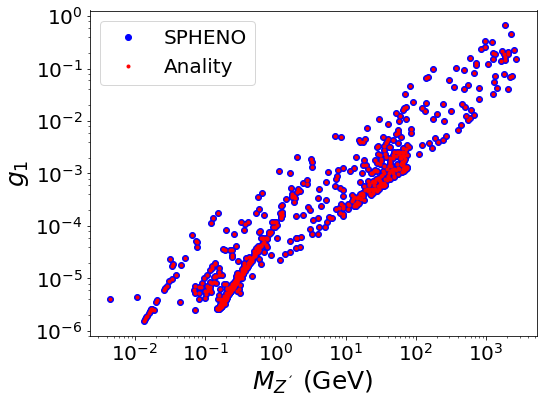

In [72]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MZp,xd.g1p,'bo',label='SPHENO')
#plt.loglog(xd.MZ,xd.g1p,'g.',label='SPHENO')

plt.loglog(5.*xd.g1p*xd.vx,xd.g1p,'r.',label='Anality')

plt.xlabel(r'$M_{Z^{´}}$ (GeV)',size=25)
plt.ylabel(r'$g_1$',size=25)
plt.legend()

plt.tight_layout()

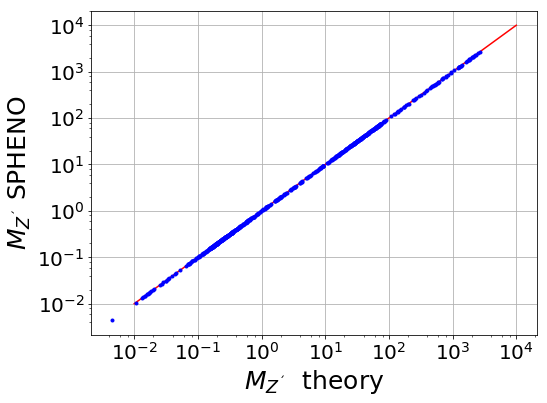

In [73]:
plt.figure(figsize=(8,6))

a = np.linspace(1e-2,1e+4,5)
plt.plot(a,a,'r-')

plt.loglog(5.*xd.g1p*xd.vx,xd.MZp,'b.')

plt.xlabel(r'$M_{Z^{´}}$  theory',size=25)
plt.ylabel(r'$M_{Z^{´}}$ SPHENO',size=25)

plt.grid()

plt.tight_layout()

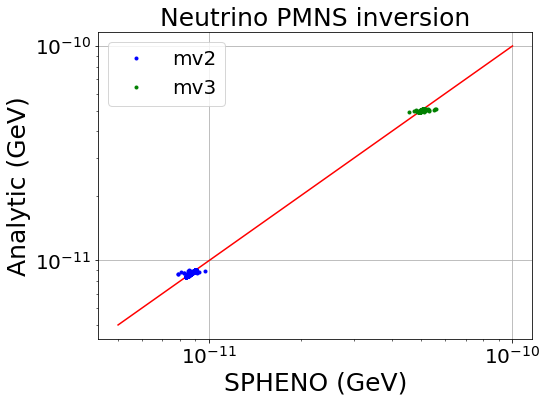

In [74]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mnu2,xd.mv2,'b.')
plt.loglog(xd.mnu3,xd.mv3,'g.')

plt.title(r'Neutrino PMNS inversion',size=25)
plt.xlabel(r'SPHENO (GeV)',size=25)
plt.ylabel(r'Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_v2.pdf')

In [75]:
print("theory:",mv1,mv2,mv3)

theory: 1e-20 8.52534652922e-12 4.99992901147e-11


/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=10.0, top=10.0
  'bottom=%s, top=%s') % (bottom, top))


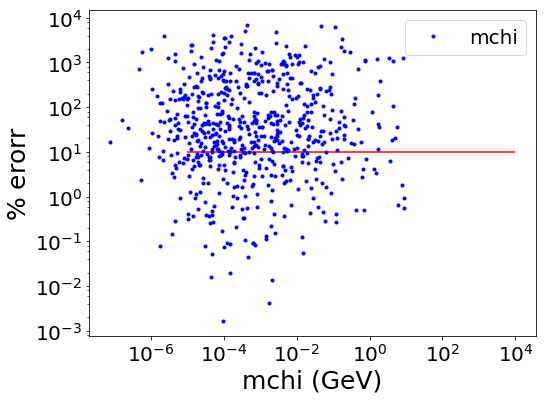

In [76]:
plt.figure(figsize=(8,6))


plt.hlines(10, 1e-5,1e4,'r')

plt.loglog(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2,xd.mchi,'b.')

plt.xlabel(r'mchi (GeV)',size=25)
plt.ylabel(r'$\%$ erorr',size=25)
plt.legend()

plt.show()

Improbing the reconstruction of the neutrino masses

In [77]:
yd = xd[np.logical_and(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2<10., np.abs(xd.mnu3-xd.mv3)*100/xd.mv3<10.)]

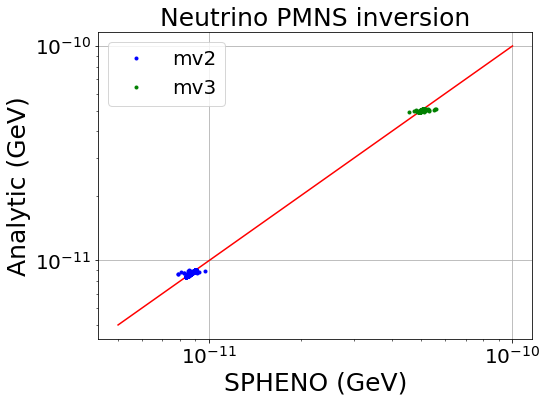

In [78]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

plt.loglog(yd.mnu2,yd.mv2,'b.')
plt.loglog(yd.mnu3,yd.mv3,'g.')

plt.title(r'Neutrino PMNS inversion',size=25)
plt.xlabel(r'SPHENO (GeV)',size=25)
plt.ylabel(r'Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_v2.pdf')

# Direct and indirec detection

In [79]:
from indirectdirect import *

In [80]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

#PANDAS 1708.06917
names1 = ['MDM', 'pandasSI']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandaXII.txt')
dd1 = pd.DataFrame(a, columns=names1)

pandaX=interpolate.interp1d(dd1.MDM,dd1.pandasSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

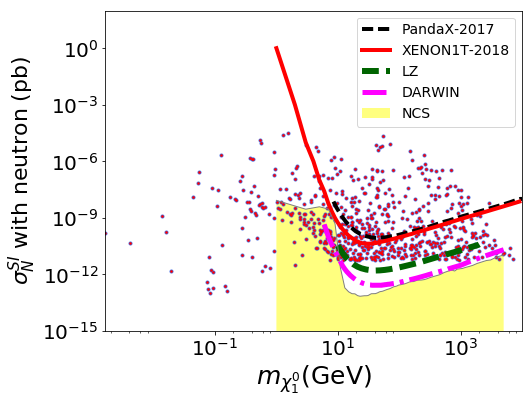

In [81]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')
#good points of netrino reconstrucction
plt.loglog(yd.mchi, yd.SIN, color='red', marker='.',ms=3,linestyle='', label=r'')

#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=4,label='XENON1T-2018')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=6,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='magenta',linestyle='-.',lw=5,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':14},loc='best')

plt.xlim(yd.mchi.min(),1.0e4)
plt.ylim(1e-15,1e2)

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

# 